# Corpus size analysis
This notebook explores the effect of training corpus size on model performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from os import listdir
import json
from ast import literal_eval
import numpy as np

In order to get the data visualizeds in this notebook, the following algorithm was used:

```
for model in models:
    initial_train = pick 150 random docs
    test = pick 30 random docs
    dev = pick 20 random docs
    for subset_num in range(7):
        train = initial_train + 50 more random docs
        train model
        evaluate model
```
Documents were sampled without replacement, and there are no overlaps between any sets.

 ## Loading the data

Read in the test performance files:

In [2]:
test_perf_prefix = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/corpus_size_analysis/performance/'
test_perf_paths = {
    'bioinfer': 'bioinfer_all_test_30_performance_with_types.jsonl',
    'chemprot': 'chemprot_all_test_30_performance_with_types.jsonl',
    'scierc': 'scierc_all_test_30_performance_with_types.jsonl'
}
test_perf_dfs = {k: pd.read_csv(f'{test_perf_prefix}{v}') for k,v in test_perf_paths.items()}

Read in the reported validation scores:

In [3]:
def get_val_perfs(model_path, dset_name):
    """
    Get the reported mean validation F1 scores for a given set of models.

    parameters:
        model_path, str: path to models
        dset_name, str: name of dataset, should be substring at the beginning
            of the models of interest

    returns:
        val_perfs, df: rows are models, columns are ent and rel perfs
    """
    val_perfs_dict = {'model': [], 'ent_F1': [], 'rel_F1': []}
    for f in listdir(model_path):
        if dset_name in f and f.split('_')[-1].isdigit():
            val_perfs_dict['model'].append(f)
            with open(f'{model_path}/{f}/metrics.json') as myf:
                metric_json = json.load(myf)
            val_perfs_dict['ent_F1'].append(metric_json['best_validation__MEAN__ner_f1'])
            val_perfs_dict['rel_F1'].append(metric_json['best_validation_MEAN__relation_f1'])
    val_perfs = pd.DataFrame(val_perfs_dict)
    return val_perfs

In [4]:
model_path = '/mnt/home/lotrecks/Shiu_lab/dygiepp/models'
val_perf_dfs = {}
for dset_name in test_perf_paths.keys():
    val_perf_dfs[dset_name] = get_val_perfs(model_path, dset_name)

Check that those both look right:

In [5]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,chemprot_350.jsonl,chemprot_test_30.jsonl,0.872185,0.918025,0.894388,0.451285,0.511443,0.474469,"(0.8294314092953524, 0.9078621281464532)","(0.8805290559135455, 0.9458986779120128)","(0.8612794934689618, 0.9225690525690525)","(0.2536302211302211, 0.6893379987129985)","(0.39041501976284587, 0.6416171897087927)","(0.3184527063969382, 0.6420588235294117)"
1,chemprot_150.jsonl,chemprot_test_30.jsonl,0.856728,0.911898,0.883305,0.460430,0.335915,0.386003,"(0.7998069852941176, 0.9073709412897596)","(0.8771462578556466, 0.9410165020206556)","(0.842302220914119, 0.9194958177766202)","(0.2318354212159522, 0.6846398583049066)","(0.20063954303336137, 0.45195153533111354)","(0.22378447644618013, 0.5253271168596781)"
2,chemprot_200.jsonl,chemprot_test_30.jsonl,0.866952,0.896413,0.881278,0.487200,0.357844,0.408991,"(0.8181767270723247, 0.9071044289886784)","(0.8549075318286378, 0.9322876434068607)","(0.845490595171252, 0.9122093646166)","(0.26433529411764706, 0.7108585858585857)","(0.22453416149068323, 0.47034942182001005)","(0.24955808080808076, 0.5474235501791183)"
3,chemprot_450.jsonl,chemprot_test_30.jsonl,0.881913,0.921014,0.900924,0.501246,0.562073,0.526369,"(0.8456884549478795, 0.9158126151012891)","(0.8871669851037608, 0.9484605655218497)","(0.8736024298126219, 0.9257394310121888)","(0.2769858397698016, 0.7586734693877549)","(0.40363008090926605, 0.6766273899510894)","(0.3326248313090418, 0.7069373848987109)"
4,chemprot_500.jsonl,chemprot_test_30.jsonl,0.898902,0.936420,0.917155,0.564504,0.583075,0.571815,"(0.8589186507936507, 0.9355683542394387)","(0.9130905267995977, 0.9574417372881356)","(0.8896221284371737, 0.9396153030542613)","(0.3549202127659575, 0.7534852801519468)","(0.4198015873015873, 0.7137130801687763)","(0.402269647696477, 0.7226133833352865)"
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.889071,0.925920,0.907005,0.477718,0.482854,0.476188,"(0.8435195034367018, 0.9269895298423924)","(0.8940015142068228, 0.9490856520281595)","(0.8764020202020202, 0.9338068100970431)","(0.290315897104725, 0.6784018841204359)","(0.3808957510279771, 0.5899642707019757)","(0.33632075471698114, 0.5942236965457561)"
6,chemprot_300.jsonl,chemprot_test_30.jsonl,0.874491,0.924040,0.898440,0.466726,0.501797,0.478709,"(0.8334531013615735, 0.9163777952576024)","(0.8946704760268087, 0.9498523204541408)","(0.8691102498556939, 0.9269682034976152)","(0.28037090558766864, 0.6876664094153964)","(0.35461921010599684, 0.6153779069767442)","(0.32150126725752876, 0.6066849816849816)"
7,chemprot_250.jsonl,chemprot_test_30.jsonl,0.841263,0.932550,0.884373,0.395613,0.480059,0.431338,"(0.7941454916089884, 0.8853249546845973)","(0.9069179078924842, 0.954625533862111)","(0.8537631810665121, 0.9141259466298347)","(0.21010493491065685, 0.5731045081967212)","(0.30564875042793566, 0.662456115909724)","(0.254818268770923, 0.5934906392891034)"


In [6]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1
0,chemprot_train_300,0.881497,0.393443
1,chemprot_train_250,0.878728,0.358974
2,chemprot_train_200,0.876827,0.329787
3,chemprot_train_450,0.902490,0.520833
4,chemprot_train_350,0.887280,0.417062
5,chemprot_train_400,0.903427,0.458537
6,chemprot_train_150,0.899482,0.232044
7,chemprot_train_500,0.909469,0.553846


Define a docnum column on each so that we can plot them:

In [7]:
for dset, df in test_perf_dfs.items():
    df['docnum'] = df['pred_file'].str.split('_').str[1].str[:-6].astype(int)
    test_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)
for dset, df in val_perf_dfs.items():
    df['docnum'] = df['model'].str.split('_').str[2].astype(int)
    val_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)

In [8]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,chemprot_150.jsonl,chemprot_test_30.jsonl,0.856728,0.911898,0.883305,0.460430,0.335915,0.386003,"(0.7998069852941176, 0.9073709412897596)","(0.8771462578556466, 0.9410165020206556)","(0.842302220914119, 0.9194958177766202)","(0.2318354212159522, 0.6846398583049066)","(0.20063954303336137, 0.45195153533111354)","(0.22378447644618013, 0.5253271168596781)",150
1,chemprot_200.jsonl,chemprot_test_30.jsonl,0.866952,0.896413,0.881278,0.487200,0.357844,0.408991,"(0.8181767270723247, 0.9071044289886784)","(0.8549075318286378, 0.9322876434068607)","(0.845490595171252, 0.9122093646166)","(0.26433529411764706, 0.7108585858585857)","(0.22453416149068323, 0.47034942182001005)","(0.24955808080808076, 0.5474235501791183)",200
2,chemprot_250.jsonl,chemprot_test_30.jsonl,0.841263,0.932550,0.884373,0.395613,0.480059,0.431338,"(0.7941454916089884, 0.8853249546845973)","(0.9069179078924842, 0.954625533862111)","(0.8537631810665121, 0.9141259466298347)","(0.21010493491065685, 0.5731045081967212)","(0.30564875042793566, 0.662456115909724)","(0.254818268770923, 0.5934906392891034)",250
3,chemprot_300.jsonl,chemprot_test_30.jsonl,0.874491,0.924040,0.898440,0.466726,0.501797,0.478709,"(0.8334531013615735, 0.9163777952576024)","(0.8946704760268087, 0.9498523204541408)","(0.8691102498556939, 0.9269682034976152)","(0.28037090558766864, 0.6876664094153964)","(0.35461921010599684, 0.6153779069767442)","(0.32150126725752876, 0.6066849816849816)",300
4,chemprot_350.jsonl,chemprot_test_30.jsonl,0.872185,0.918025,0.894388,0.451285,0.511443,0.474469,"(0.8294314092953524, 0.9078621281464532)","(0.8805290559135455, 0.9458986779120128)","(0.8612794934689618, 0.9225690525690525)","(0.2536302211302211, 0.6893379987129985)","(0.39041501976284587, 0.6416171897087927)","(0.3184527063969382, 0.6420588235294117)",350
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.889071,0.925920,0.907005,0.477718,0.482854,0.476188,"(0.8435195034367018, 0.9269895298423924)","(0.8940015142068228, 0.9490856520281595)","(0.8764020202020202, 0.9338068100970431)","(0.290315897104725, 0.6784018841204359)","(0.3808957510279771, 0.5899642707019757)","(0.33632075471698114, 0.5942236965457561)",400
6,chemprot_450.jsonl,chemprot_test_30.jsonl,0.881913,0.921014,0.900924,0.501246,0.562073,0.526369,"(0.8456884549478795, 0.9158126151012891)","(0.8871669851037608, 0.9484605655218497)","(0.8736024298126219, 0.9257394310121888)","(0.2769858397698016, 0.7586734693877549)","(0.40363008090926605, 0.6766273899510894)","(0.3326248313090418, 0.7069373848987109)",450
7,chemprot_500.jsonl,chemprot_test_30.jsonl,0.898902,0.936420,0.917155,0.564504,0.583075,0.571815,"(0.8589186507936507, 0.9355683542394387)","(0.9130905267995977, 0.9574417372881356)","(0.8896221284371737, 0.9396153030542613)","(0.3549202127659575, 0.7534852801519468)","(0.4198015873015873, 0.7137130801687763)","(0.402269647696477, 0.7226133833352865)",500


In [9]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1,docnum
0,chemprot_train_150,0.899482,0.232044,150
1,chemprot_train_200,0.876827,0.329787,200
2,chemprot_train_250,0.878728,0.358974,250
3,chemprot_train_300,0.881497,0.393443,300
4,chemprot_train_350,0.887280,0.417062,350
5,chemprot_train_400,0.903427,0.458537,400
6,chemprot_train_450,0.902490,0.520833,450
7,chemprot_train_500,0.909469,0.553846,500


SciERC didn't have enough documents to do the 500 doc training set, so we need to add a phantom row to avoid issues when plotting:

In [10]:
test_perf_dfs['scierc'].loc[7] = ['scierc_500.jsonl', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, '(0, 0)', '(0, 0)', '(0, 0)', '(0, 0)', 500]
val_perf_dfs['scierc'].loc[7] = ['scierc_train_500', np.nan, np.nan, 500]

In [11]:
test_perf_dfs['scierc']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,scierc_150.jsonl,scierc_test_30.jsonl,0.682606,0.684047,0.683149,0.427921,0.296266,0.348944,"(0.6219409366129727, 0.732652621437988)","(0.6385315450149667, 0.7274545454545455)","(0.6357457629331732, 0.7255726425453424)","(0.34734534942499684, 0.5120481927710844)","(0.22499940937440938, 0.3845423813350328)","(0.2768008503509747, 0.42503577907679896)",150
1,scierc_200.jsonl,scierc_test_30.jsonl,0.686655,0.689038,0.687671,0.494437,0.304011,0.375710,"(0.6361491317671093, 0.7432927394916408)","(0.6440478722992783, 0.7362058673034283)","(0.6424906052817648, 0.7341673877099949)","(0.4125544267053701, 0.5787687969924812)","(0.23483891500195847, 0.3847677793904209)","(0.3080558744737849, 0.4550534239237687)",200
2,scierc_250.jsonl,scierc_test_30.jsonl,0.684131,0.689566,0.686707,0.481902,0.382148,0.425156,"(0.6351589089089089, 0.7346124333299788)","(0.6443428825141886, 0.7357016025303963)","(0.6439120976239845, 0.7315444617353497)","(0.4087242008069522, 0.558332101684895)","(0.28818381645830476, 0.48760624780932343)","(0.34292594866756726, 0.5147298380631713)",250
3,scierc_300.jsonl,scierc_test_30.jsonl,0.680568,0.706304,0.693031,0.511169,0.399233,0.447638,"(0.610876784238282, 0.7451707261315932)","(0.6584199122173454, 0.7654605764831477)","(0.6380560694150811, 0.750193896980391)","(0.4415013679890561, 0.5803387096774193)","(0.32103634723120017, 0.48016409266409255)","(0.3770536025060912, 0.5200494966513272)",300
4,scierc_350.jsonl,scierc_test_30.jsonl,0.669661,0.707070,0.687656,0.490068,0.352491,0.409049,"(0.6101815879843213, 0.7311966031909418)","(0.669516975464112, 0.7487004652655221)","(0.6414146540859079, 0.735551849033824)","(0.3882186517252071, 0.5802094474153296)","(0.2880287192551641, 0.4291586538461538)","(0.33547781360982976, 0.48505985552115577)",350
5,scierc_400.jsonl,scierc_test_30.jsonl,0.691785,0.701991,0.696704,0.514838,0.443958,0.475976,"(0.6341871717790273, 0.7465586109900935)","(0.6535754938679592, 0.7447449795010771)","(0.6465036156438118, 0.7405997767512773)","(0.4462891068589598, 0.5849846517811754)","(0.3602051362355152, 0.5316508448832352)","(0.4093718449677896, 0.5426495489059978)",400
6,scierc_450.jsonl,scierc_test_30.jsonl,0.681998,0.701591,0.691484,0.494898,0.394666,0.438336,"(0.6267932497970821, 0.7293267066896556)","(0.654905303030303, 0.7446655941949617)","(0.6433030717572441, 0.7315663366410394)","(0.41479433723059583, 0.5804545454545453)","(0.31601958069620256, 0.47061104407597715)","(0.3651122087517071, 0.5127681376398978)",450
7,scierc_500.jsonl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)",500


In [12]:
val_perf_dfs['scierc']

,model,ent_F1,rel_F1,docnum
0,scierc_train_150,0.614173,0.309091,150
1,scierc_train_200,0.593320,0.303318,200
2,scierc_train_250,0.595661,0.309735,250
3,scierc_train_300,0.636364,0.394366,300
4,scierc_train_350,0.630975,0.392523,350
5,scierc_train_400,0.648221,0.393013,400
6,scierc_train_450,0.610568,0.394737,450
7,scierc_train_500,NaN,NaN,500


## Plot

Now, we need to `literal_eval` the confidence intervals on the test set and get them into a useable format, and then plot:

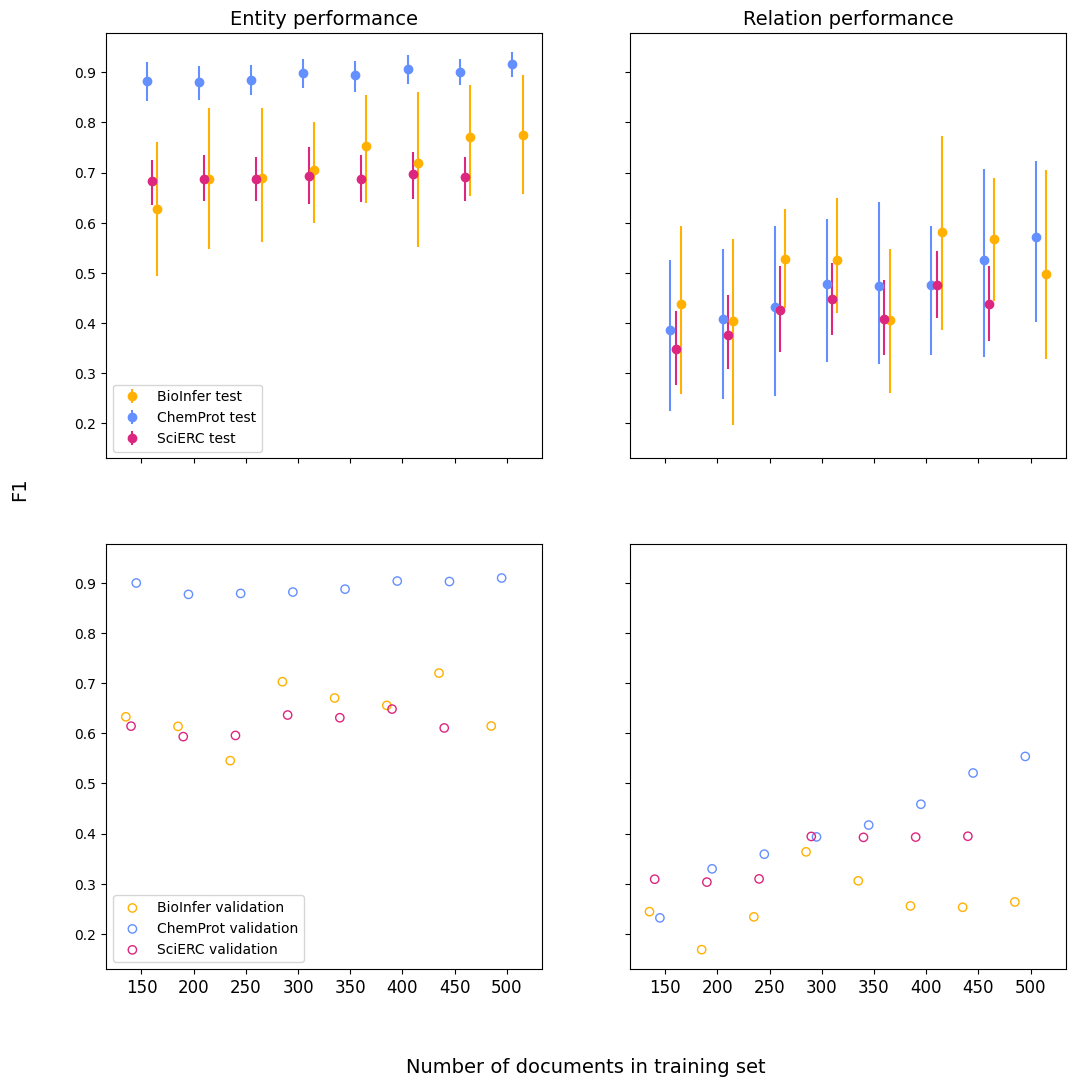

In [13]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))

# Colors from the IBM palette
colors = {'chemprot': '#648FFF',
         'scierc': '#DC267F',
         'bioinfer': '#FFB000'}
offset = {'chemprot': 0.1,
         'scierc': 0.2,
         'bioinfer': 0.3}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer'}

name_x = [150, 200, 250, 300, 350, 400, 450, 500]
x = np.arange(len(name_x))

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name]
    val_df = val_perf_dfs[dset_name]
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    
axs[0,0].set_xticks(x, name_x, size=12)
axs[0,1].set_xticks(x, name_x, size=12)
axs[1,0].set_xticks(x, name_x, size=12)
axs[1,1].set_xticks(x, name_x, size=12)
axs[0,0].set_title('Entity performance', size=14)
axs[0,1].set_title('Relation performance', size=14)
axs[0,0].legend(loc='lower left')
axs[1,0].legend(loc='lower left')
fig.supxlabel('Number of documents in training set', size=14)
fig.supylabel('F1', size=14)
fig.subplots_adjust(bottom=0.1, left=0.1)